In [3]:
#task 1 
#Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc
import pandas as pd

# Loading the dataset
df = pd.read_csv('births.csv')

# Extracting the year and calculating the decade
df['Decade'] = df['year'].apply(lambda x: (x // 10) * 10)

# Performing EDA
print(df.head())



   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


In [4]:
#task 02 
#Q.2: Show the descriptive statistics of the data.
# Showing descriptive statistics
print(df.describe())


               year         month           day         births        Decade
count  15547.000000  15547.000000  15067.000000   15547.000000  15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561   1974.544285
std        6.728340      3.449632     15.284034   28552.465810      6.789583
min     1969.000000      1.000000      1.000000       1.000000   1960.000000
25%     1974.000000      4.000000      8.000000    4358.000000   1970.000000
50%     1979.000000      7.000000     16.000000    4814.000000   1970.000000
75%     1984.000000     10.000000     24.000000    5289.500000   1980.000000
max     2008.000000     12.000000     99.000000  199622.000000   2000.000000


In [5]:
#task 03 
#Q.3: Check if your data contains any missing values
# Checking for missing values
missing_values = df.isnull().sum()

# Displaying columns with missing values
print(missing_values[missing_values > 0])


day    480
dtype: int64


<Axes: title={'center': 'Trend of Male and Female Births Every Decade'}, xlabel='Decade', ylabel='Total Births'>

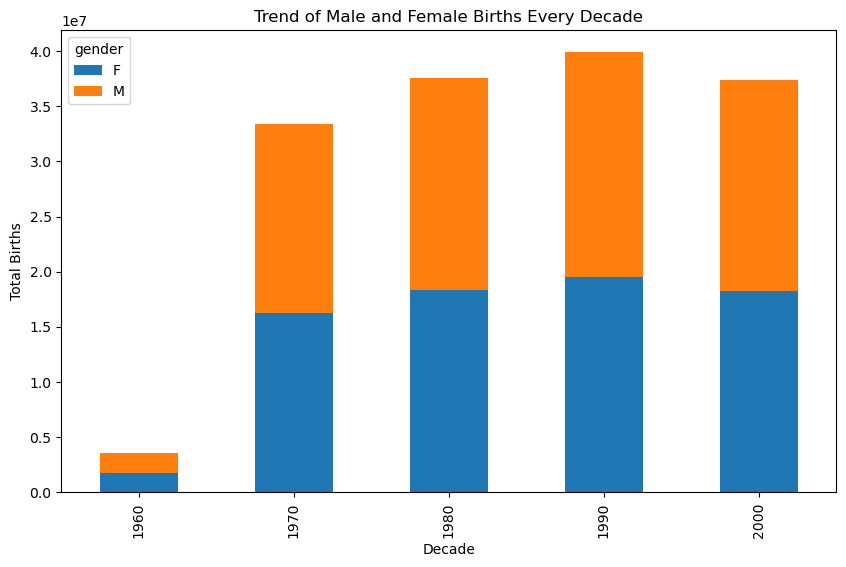

In [8]:
#task 04 
#Q.4: What is the trend of male & female births every decade?

births_per_decade_gender = df.groupby(['Decade', 'gender'])['births'].sum().unstack()

births_per_decade_gender.plot(kind='bar', stacked=True, figsize=(10, 6), xlabel='Decade', ylabel='Total Births', title='Trend of Male and Female Births Every Decade')


In [11]:
#task 05 
#Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean.This is a common statistical technique used to focus on the central
#tendency of the data while excluding extreme values

# Calculating the mean and standard deviation of the 'Births' column
mean_births = df['births'].mean()
std_dev_births = df['births'].std()

# Defining the lower and upper bounds for including values
lower_bound = mean_births - 5 * std_dev_births
upper_bound = mean_births + 5 * std_dev_births

# Removing outliers by filtering the dataset
df_cleaned = df[(df['births'] >= lower_bound) & (df['births'] <= upper_bound)]

# Displaying the cleaned dataset
print(df_cleaned)


       year  month  day gender  births  Decade
0      1969      1  1.0      F    4046    1960
1      1969      1  1.0      M    4440    1960
2      1969      1  2.0      F    4454    1960
3      1969      1  2.0      M    4548    1960
4      1969      1  3.0      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15309  1999      2  NaN      F  145172    1990
15357  2001      2  NaN      F  148640    2000
15381  2002      2  NaN      F  148745    2000
15405  2003      2  NaN      F  150278    2000
15453  2005      2  NaN      F  151342    2000

[15086 rows x 6 columns]


<Axes: title={'center': 'Births by Weekday for Several Decades'}, xlabel='Decade', ylabel='Total Births'>

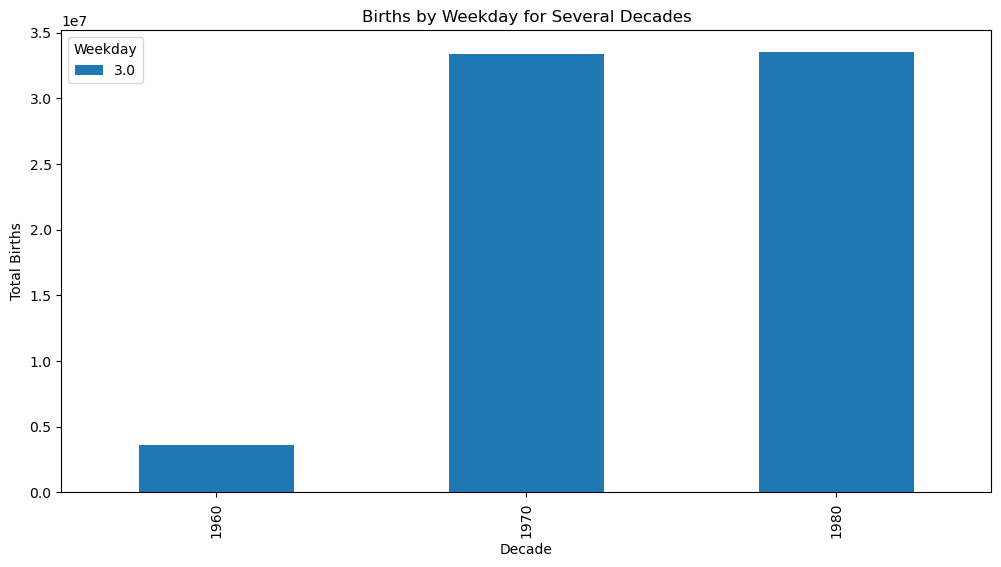

In [15]:
#task 06 
#Q.6: Plot births by weekday for several decades. Write down your observation.

# Converting the 'Date' column to datetime format
df['day'] = pd.to_datetime(df['day'])

# Extracting the weekday (0 = Monday, 6 = Sunday)
df['Weekday'] = df['day'].dt.weekday

# Grouping the data by decade and weekday, and calculate the total births
births_per_decade_weekday = df.groupby(['Decade', 'Weekday'])['births'].sum().unstack()

# Ploting the births by weekday for several decades
births_per_decade_weekday.plot(kind='bar', figsize=(12, 6), xlabel='Decade', ylabel='Total Births', title='Births by Weekday for Several Decades')


In [17]:
#task 07 
#Q.7: Group the data by month and day separately
# Extract the month and day from the 'Date' column
df['Month'] = df['day'].dt.month
df['day'] = df['day'].dt.day

# Group the data by month and calculate the total births for each month
births_per_month = df.groupby('Month')['births'].sum()

# Group the data by day and calculate the total births for each day
births_per_day = df.groupby('day')['births'].sum()

# Display the total births per month and day
print("Total Births per Month:")
print(births_per_month)

print("\nTotal Births per Day:")
print(births_per_day)


Total Births per Month:
Month
1.0    70492941
Name: births, dtype: int64

Total Births per Day:
day
1.0    70492941
Name: births, dtype: int64


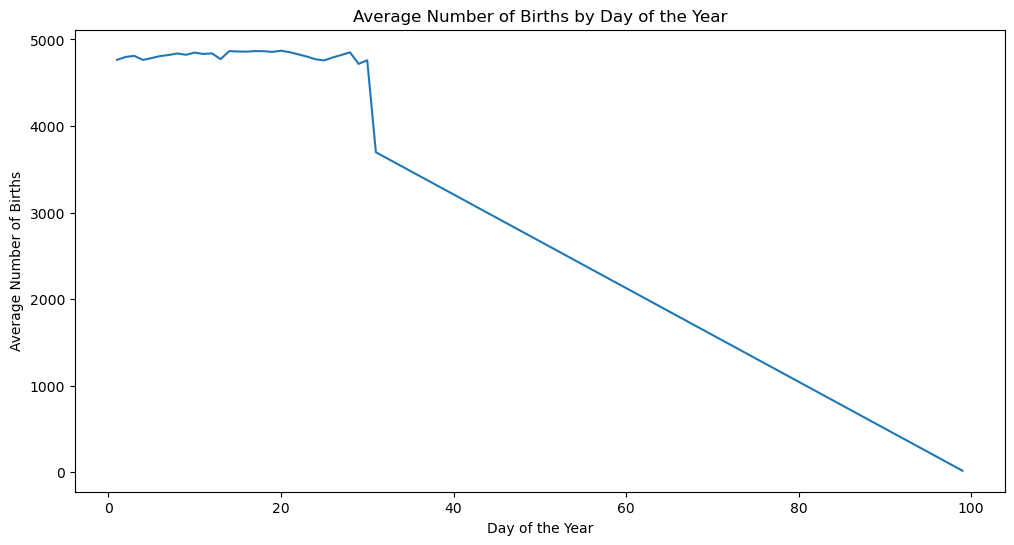

In [28]:
#task 08 
#Focusing on the month and day only, you have a time series reflecting the average number of
#births by date of the year

import pandas as pd
import matplotlib.pyplot as plt

# Loading the CSV file
df = pd.read_csv('births.csv')

# Grouping the data by day, and calculate the average number of births for each day
average_births_by_day = df.groupby('day')['births'].mean()

# Reseting the index to convert the grouped data to a DataFrame
average_births_by_day = average_births_by_day.reset_index()

# Ploting the time series of average number of births by day of the year
plt.figure(figsize=(12, 6))
plt.plot(average_births_by_day['day'], average_births_by_day['births'])
plt.xlabel('Day of the Year')
plt.ylabel('Average Number of Births')
plt.title('Average Number of Births by Day of the Year')
plt.show()
